# Shortest Path & Graphs

### This is simply a dictionary to store the all of the values of the graph

In [2]:
mapp = {
    'A': {'B': 5, 'E': 9, 'H': 8},
    'B': {'C': 12, 'D': 15, 'H': 4},
    'C': {'D': 3, 'F': 1, 'G': 11, 'H': 7},
    'D': {'G': 9},
    'E': {'F': 4, 'G': 20, 'H': 5},
    'F': {'G': 13, 'H': 6},
    'G': {},
    'H': {}
}

## networkx graph

The graph is constructed using networkx libraries and the data above

In [4]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
G = nx.Graph()

for key in mapp.keys():
    G.add_node(key)
    
to_add = []
for key, val in mapp.items():
    for in_key, in_val in val.items():
        to_add.append((key, in_key, in_val))

        
G.add_weighted_edges_from(to_add)

nx.info(G)

C:\Users\Zaurg\AppData\Local\Temp/ipykernel_8832/1694382460.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 8 nodes and 16 edges'

# Graphing the network

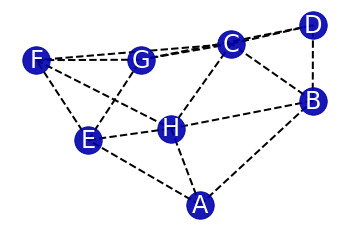

In [5]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 750, alpha = 0.9, node_color = '#0000ac')
nx.draw_networkx_edges(G, pos, 
                       width = 2, alpha = 1, edge_color = 'k', style = 'dashed')
nx.draw_networkx_labels(G, pos, font_size = 24, font_color = 'white')
limits = plt.axis('off')

## Djikstra
This uses the djikstra algorithm of the networkx library to find the shortest paths to each node from A

def get_cost(path):
    
    curr_node = path[0]
    curr_cost = 0
    for node in path[1:]:
        curr_cost += G[curr_node][node]["weight"]
        curr_node = node
    
    return curr_cost

to_not_rem = set()
for key in mapp.keys():
    path = nx.dijkstra_path(G, 'A', key)
    print("Path: " + str(path))
    print("Cost: " + str(get_cost(path)) + "\n")
    
    for i in range (1,len(path)):
        to_not_rem.add((path[i-1], path[i]))
    

## Remove edges that aren't being used

In [7]:
for start_node, end_node in list(G.edges()):
       if (start_node, end_node) not in to_not_rem and (end_node, start_node) not in to_not_rem:
            G.remove_edge(start_node, end_node)
            
nx.info(G)

C:\Users\Zaurg\AppData\Local\Temp/ipykernel_8832/2619865847.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 8 nodes and 7 edges'

## Graphing the updated Graph

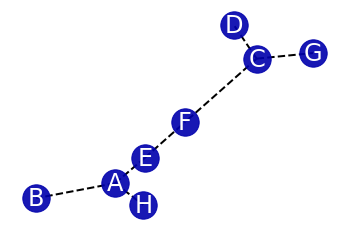

In [8]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 750, alpha = 0.9, node_color = '#0000ac')
nx.draw_networkx_edges(G, pos, 
                       width = 2, alpha = 1, edge_color = 'k', style = 'dashed')
nx.draw_networkx_labels(G, pos, font_size = 24, font_color = 'white')
limits = plt.axis('off')